# CSD 4050 - Modelling, Reg, ML Coursework 

## Importing Libraries, RF & KN Classifiers from sklearn

In [12]:
# Import necessary libraries
# Make matplotlib inline for immediate drawing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [13]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

## Loading Iris Dataset as ndarray & dataframe - Exploring the data

In [15]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()

In [237]:
#Exploring the keys of the Iris dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [242]:
#Exploring the shape of 'data' key of Iris dataset
iris.data.shape

(150, 4)

In [259]:
#Exploring the 'feature names' key
print("Feature names: ")
print(iris.feature_names)

print("\nTarget names: ")
print(iris.target_names)


Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: 
['setosa' 'versicolor' 'virginica']


In [245]:
#Changing the data from ndarray to DataFrame

iris_df = pd.DataFrame({iris.feature_names[0]:iris.data[:,0],iris.feature_names[1]:iris.data[:,1],iris.feature_names[2]:iris.data[:,2],iris.feature_names[3]:iris.data[:,3],"Target":iris.target[:]})

In [247]:
#Exploring the structure of data with 'info()'

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [248]:
#Exploring the first 5 columns of the dataset with 'head()'

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [249]:
#Exploring the distribution of different attributes with 'describe()'

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visualize the data

In [250]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14B21E90>,
      dtype=object)

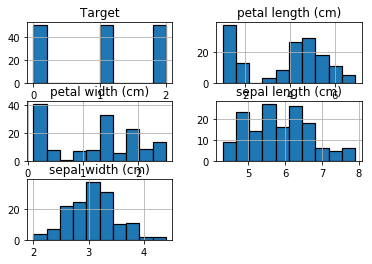

In [251]:
#Histogram showing the distribution of the data

iris_df.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14C30B10>,
      dtype=object)

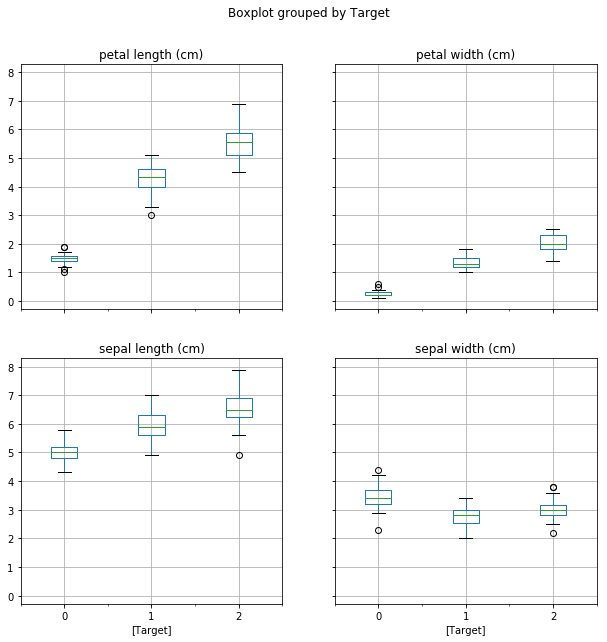

In [252]:
#Boxplot of each attribute with respect to the Target Variable

iris_df.boxplot(by="Target",figsize=(10,10))

### Features of Setosa (in blue), are easily distinguishable from the Pairplot below.

C:\Users\banerjee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\banerjee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\banerjee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\banerjee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


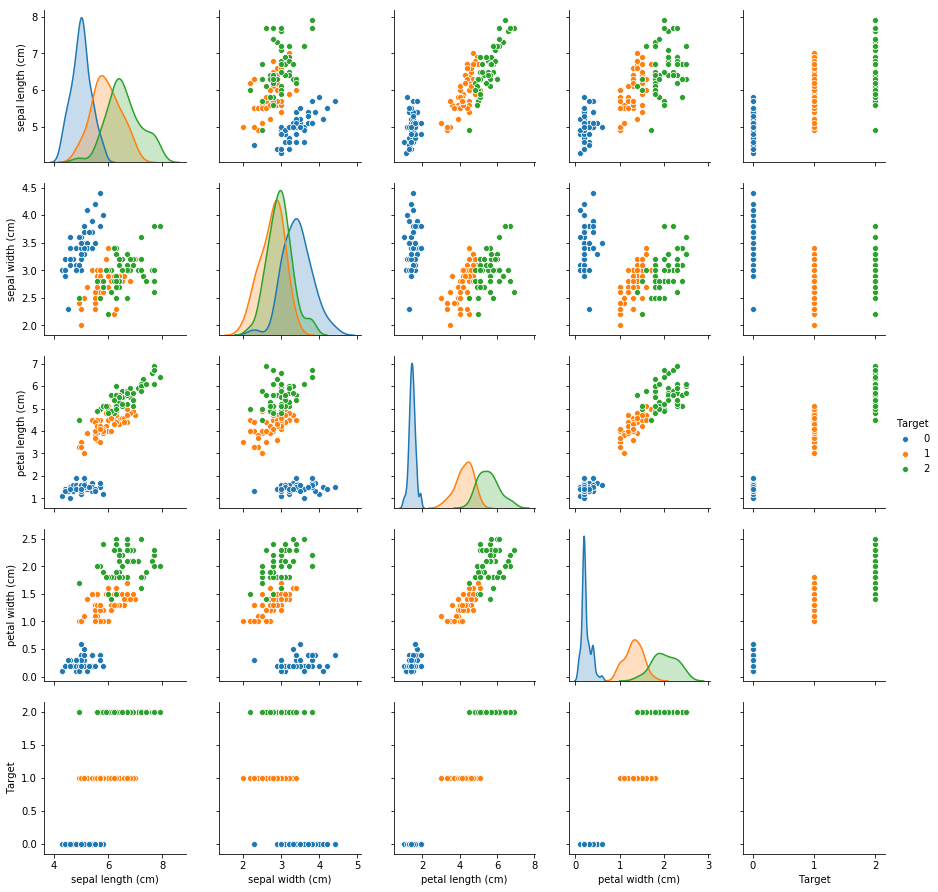

In [38]:
# Import Seaborn library.
# Pairplot showing relation between the attributes. 

import seaborn as sns 
sns.pairplot(iris_df, hue="Target")

# Building Model

In [262]:
#Splitting dataset to Train and Test
#Test size is kept at 30 %
#stratify means 'proportion of values in the sample produced will be the same as the proportion of values provided to parameter'
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of 0s and 75% of 1s,stratify=y will make sure that your random split has 25% of 0s and 75% of 1s'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, test_size=.30, stratify=iris.target,
random_state=0)

## Model Selection - Compare RF & KNN 

In [263]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [299]:
# Test options and evaluation metric
# We have used 'accuracy' among many Classification scorer objects with the scoring parameter [https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score]
#We have used KFold Cross Validation.

seed = 7
scoring = 'accuracy'

# Algorithms
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))


# Evaluating each model and appending the results (shown below)
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
# kfold = model_selection.LeaveOneOut()

 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 #print(cv_results)
 results.append(cv_results)
 names.append(name)
 print(name, cv_results.mean(), cv_results.std())

C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\f

RFC 0.9327272727272728 0.044200893749611704
KNN 0.9218181818181819 0.07443450723803169


C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\banerjee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#### Removing the warnings above

#### We can see the difference in the model results during cross valisation when we change the parameters 'scoring' & CV Iterators parameters

#SCORING

#scoring = 'accuracy'
RFC 0.9418181818181818 0.04762109401348653
KNN 0.9218181818181819 0.07443450723803169

#scoring = 'f1_weighted'
RFC 0.9419196359196359 0.04751227421514558
KNN 0.9203124098124098 0.07832909519441915

---------------------------------------------

#CROSS VALIDATION


#CROSS VALIDATION is Repeated KFold
RFC 0.9323636363636365 0.0648497309424317
KNN 0.9342727272727274 0.06226914389159156

#CROSS VALIDATION is KFold
RFC 0.9427272727272727 0.046895346823741565
KNN 0.9218181818181819 0.07443450723803169

#CROSS VALIDATION is Leave One Out --  kfold = model_selection.LeaveOneOut()
RFC 0.9428571428571428 0.2321153829895989
KNN 0.9333333333333333 0.24944382578492943

### Test Accuracy and Build RF

In [346]:
# random_state=0, bootstrapping does not replicate of the result
# the target is multi-output and not binary, hence we use balanced subsample,the balanced subsample uses the bootstrapped weights for each tree
# n_estimators= the number of trees, manually set to 20


# arrays to store accuracy
train_acc = []
test_acc = []

# set number of trees to 20
estimators_settings = range(1, 12)

print("\nWe find the accuracy with respect to each tree added to the parameter. \n\nFor Tree - Train Accuracy vs Test Accuracy : \n")

for n_estimators in estimators_settings:
    # build the model
    forest = RandomForestClassifier(n_estimators=n_estimators,class_weight="balanced_subsample", random_state=0)
    forest.fit(X_train, y_train)
    # store training set accuracy
    train_acc.append(forest.score(X_train, y_train))
    # store test (generalization) accuracy
    test_acc.append(forest.score(X_test, y_test))
    #print(train_acc.append(forest.score(X_train, y_train)),test_acc.append(forest.score(X_test, y_test)))
    
    print("For ",n_estimators,":", forest.score(X_train, y_train),forest.score(X_test, y_test))
    


We find the accuracy with respect to each tree added to the parameter. 

For Tree - Train Accuracy vs Test Accuracy : 

For  1 : 0.9714285714285714 0.9777777777777777
For  2 : 0.9714285714285714 0.9333333333333333
For  3 : 0.9904761904761905 1.0
For  4 : 0.9809523809523809 0.9555555555555556
For  5 : 0.9904761904761905 1.0
For  6 : 0.9809523809523809 0.9555555555555556
For  7 : 0.9904761904761905 0.9777777777777777
For  8 : 0.9904761904761905 0.9777777777777777
For  9 : 0.9904761904761905 1.0
For  10 : 0.9809523809523809 0.9777777777777777
For  11 : 0.9904761904761905 1.0


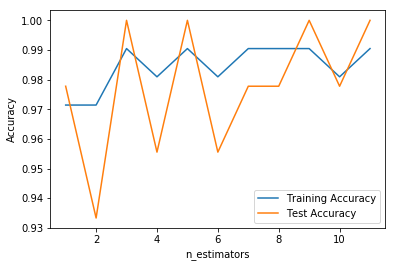

In [347]:
# We plot the Training and Test Accuracy in the below plot.

plt.plot(estimators_settings, train_acc,label="Training Accuracy")
plt.plot(estimators_settings, test_acc,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()


### Feature Importance of RF

#### Observation : On reducing the n_estimators (=12), we found the Petal Width to be more important feature
#### and on increasing the n_estimators (=20), we find Petal Length to be also  important feature as Petal Width

In [348]:
#From the below plot we find the Petal Width and Petal Length are important features used by RF to classify Target.
#plot is represented by horizontal bar
#

def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features),
    model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),
    iris.feature_names)
    plt.xlabel("Feature_Importance")
    plt.ylabel("Feature_Names")

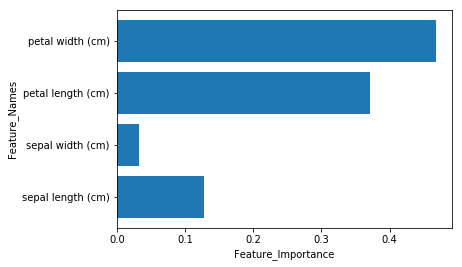

In [349]:
plot_feature_importances_iris(forest)

### Building a model with tested estimators and checking prediction through Accuracy and Confusion Matrix

In [333]:
# build the model
forest = RandomForestClassifier(n_estimators=18,class_weight="balanced_subsample", random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=18, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [334]:
predictions = forest.predict(X_test)

In [335]:
print("Accuracy Score on Test data: ")
print(accuracy_score(y_test, predictions))
print("\nConfusion Matrix on Test data: "),print(confusion_matrix(y_test, predictions))

Accuracy Score on Test data: 
1.0

Confusion Matrix on Test data: 
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


(None, None)

### Test Accuracy and Build KNN

In [336]:
# Arrays to store Accuracy
training_accuracy = []
test_accuracy = []

# setting neighbors range 1 to 10
neighbors_settings = range(1, 11)

In [339]:
#parameter 'algorithm' is default auto, to let decide most appropriate algorithhm. 


for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # store training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # store test (generalization) accuracy
    test_accuracy.append(knn.score(X_test, y_test))



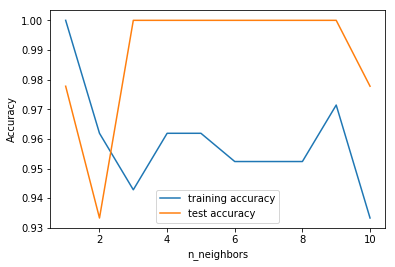

In [341]:
# We plot the Training and Test Accuracy in the below plot.


plt.plot(neighbors_settings, training_accuracy,label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Building a model with tested estimators and checking prediction through Accuracy and Confusion Matrix


In [343]:
# building the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [344]:
predictions2 = knn.predict(X_test)

In [345]:
print("Accuracy Score on Test data: ")

print(accuracy_score(y_test, predictions2))

print("\nConfusion Matrix on Test data: "),print(confusion_matrix(y_test, predictions2))

Accuracy Score on Test data: 
1.0

Confusion Matrix on Test data: 
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


(None, None)